In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [17]:
import pandas as pd
import seaborn as sns

In [99]:
k35_df = pd.read_csv('mmetsp/Asterionellopsis_glacialis/k35/decision_nodes.csv', skipinitialspace=True)
k27_df = pd.read_csv('mmetsp/Asterionellopsis_glacialis/k27/decision_nodes.csv', skipinitialspace=True)

In [100]:
k35_df.head()

,read_n,l_degree,r_degree,position,hash
0,414,2,1,9,4552537295491192989
1,555,2,1,3,10400599629126302337
2,917,2,1,5,8559623946996443022
3,1056,1,2,12,9867647372000252236
4,1929,2,1,6,10446294276324287310


We can find the number of decision nodes in the dBG by counting unique hashes...

In [101]:
k27_df.hash.nunique(), k35_df.hash.nunique()

(1465148, 966286)

We'll make a new column for total degree, for convenience.

In [102]:
k35_df['degree'] = k35_df['l_degree'] + k35_df['r_degree']
k27_df['degree'] = k27_df['l_degree'] + k27_df['r_degree']

Let's start with the overal degree distribution during the entire construction process.

/home/camille/miniconda/envs/goetia/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


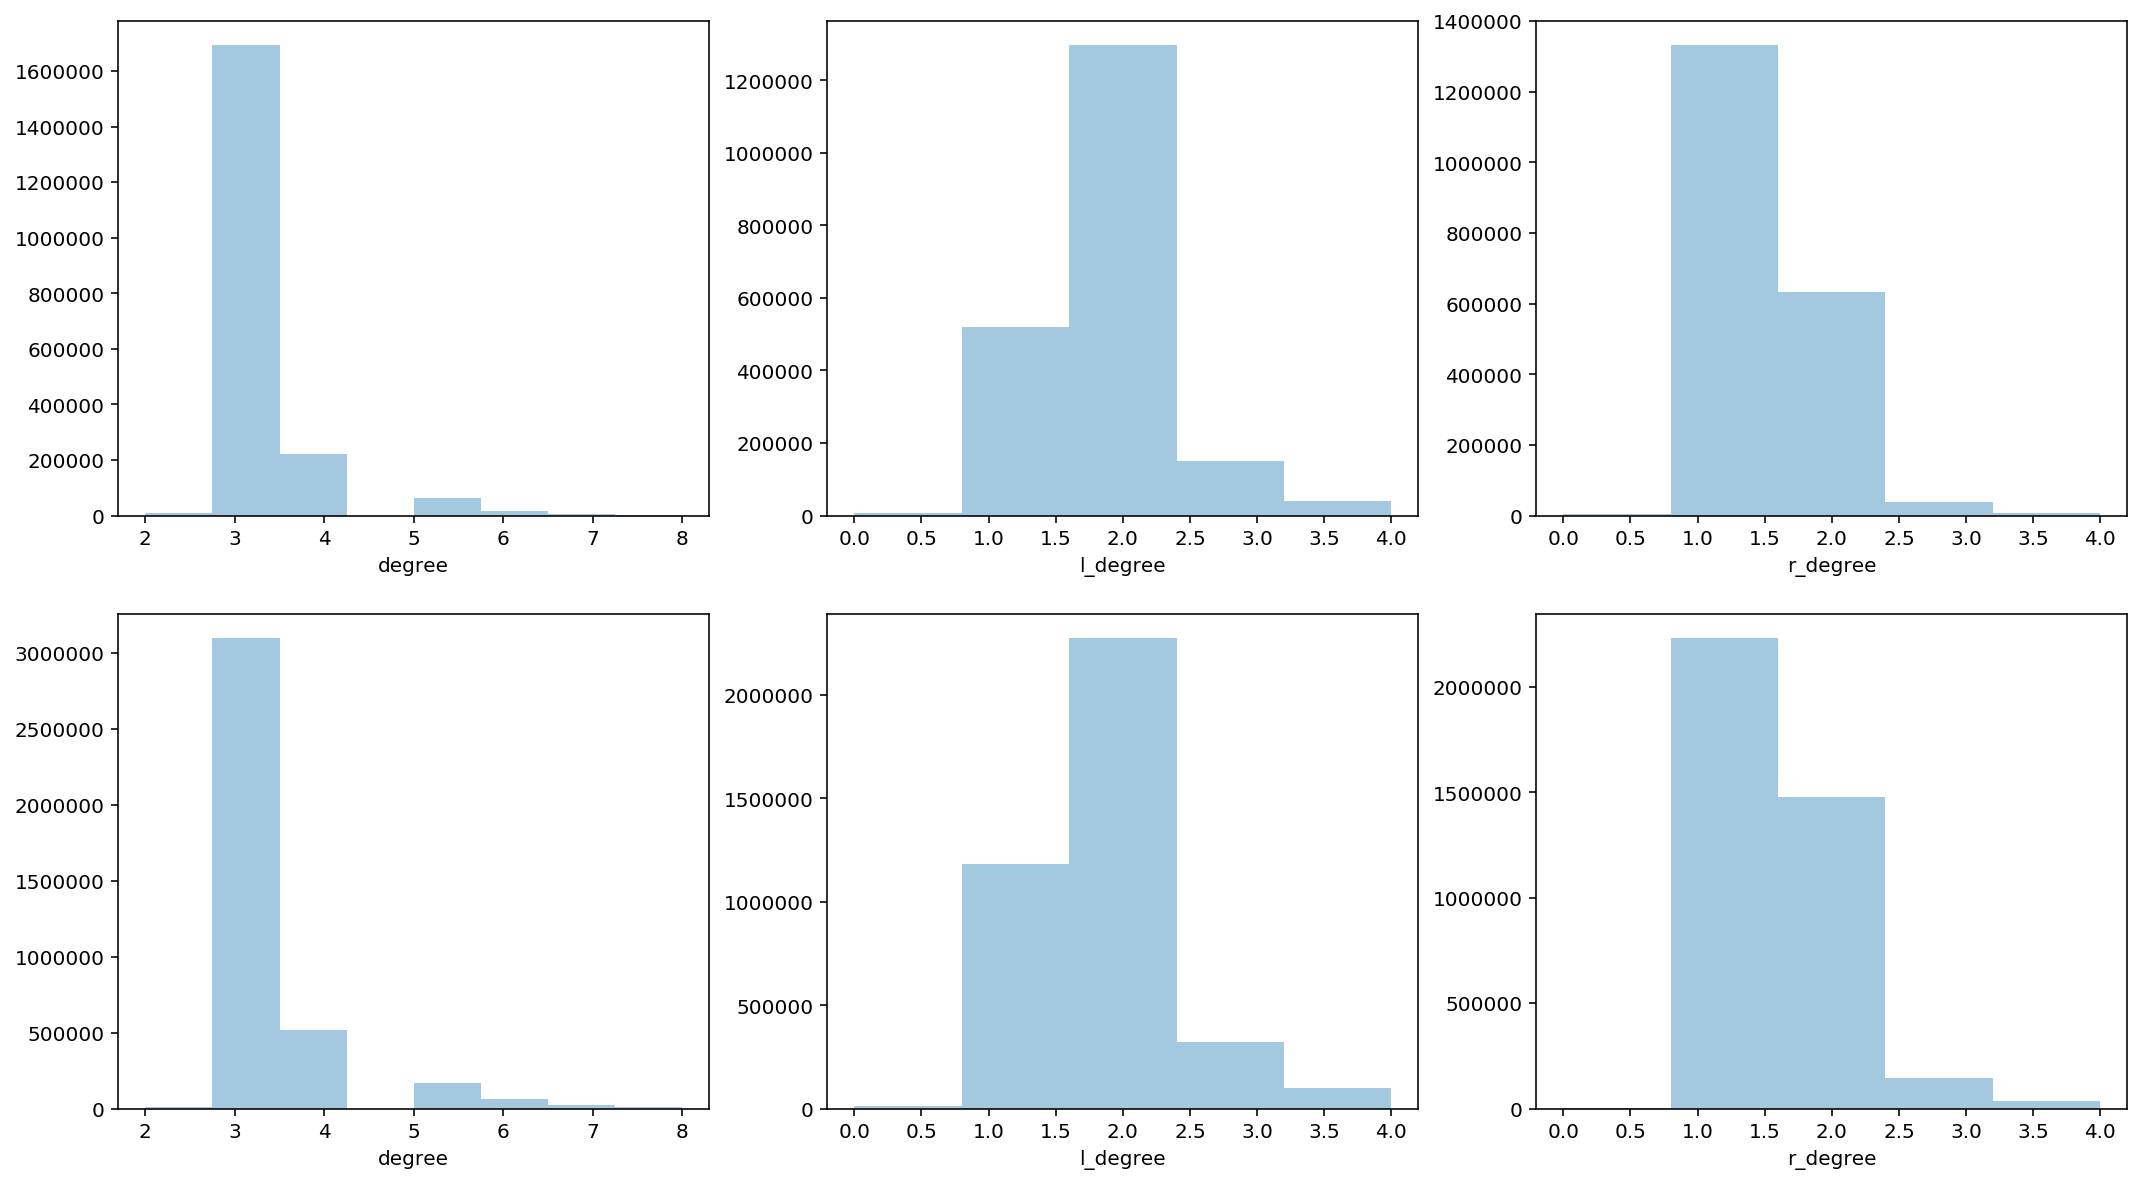

In [103]:
figsize(18,10)
fig, ax_mat = subplots(ncols=3, nrows=2)
top = ax_mat[0]
sns.distplot(k35_df.degree, kde=False, ax=top[0], bins=8)
sns.distplot(k35_df.l_degree, kde=False, ax=top[1], bins=5)
sns.distplot(k35_df.r_degree, kde=False, ax=top[2], bins=5)

bottom = ax_mat[1]
sns.distplot(k27_df.degree, kde=False, ax=bottom[0], bins=8)
sns.distplot(k27_df.l_degree, kde=False, ax=bottom[1], bins=5)
sns.distplot(k27_df.r_degree, kde=False, ax=bottom[2], bins=5)

So most decision nodes in this dataset have degree 3. Note that a few have degree 2; these forks without handles.

/home/camille/miniconda/envs/goetia/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


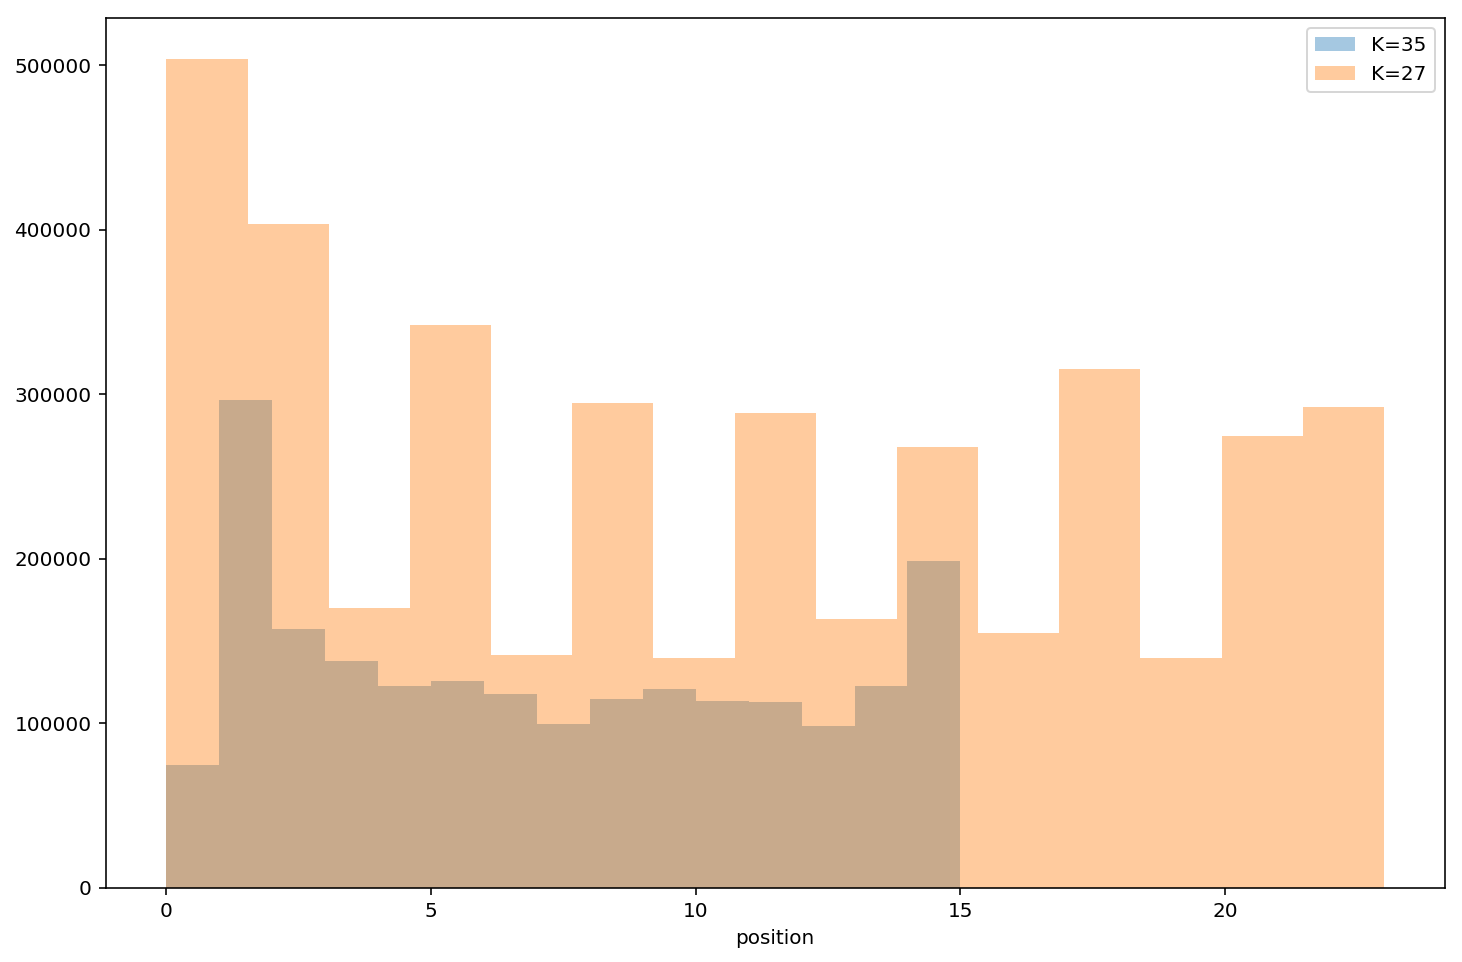

In [109]:
figsize(12,8)
sns.distplot(k35_df.position, kde=False, label='K=35', bins=15)
sns.distplot(k27_df.position, kde=False, label='K=27', bins=15)
legend()

In [36]:
melted_df = k35_df.melt(id_vars=['hash', 'position'], value_vars=['l_degree', 'r_degree'], )
melted_df.head()

,hash,position,variable,value
0,4552537295491192989,9,l_degree,2
1,10400599629126302337,3,l_degree,2
2,8559623946996443022,5,l_degree,2
3,9867647372000252236,12,l_degree,1
4,10446294276324287310,6,l_degree,2


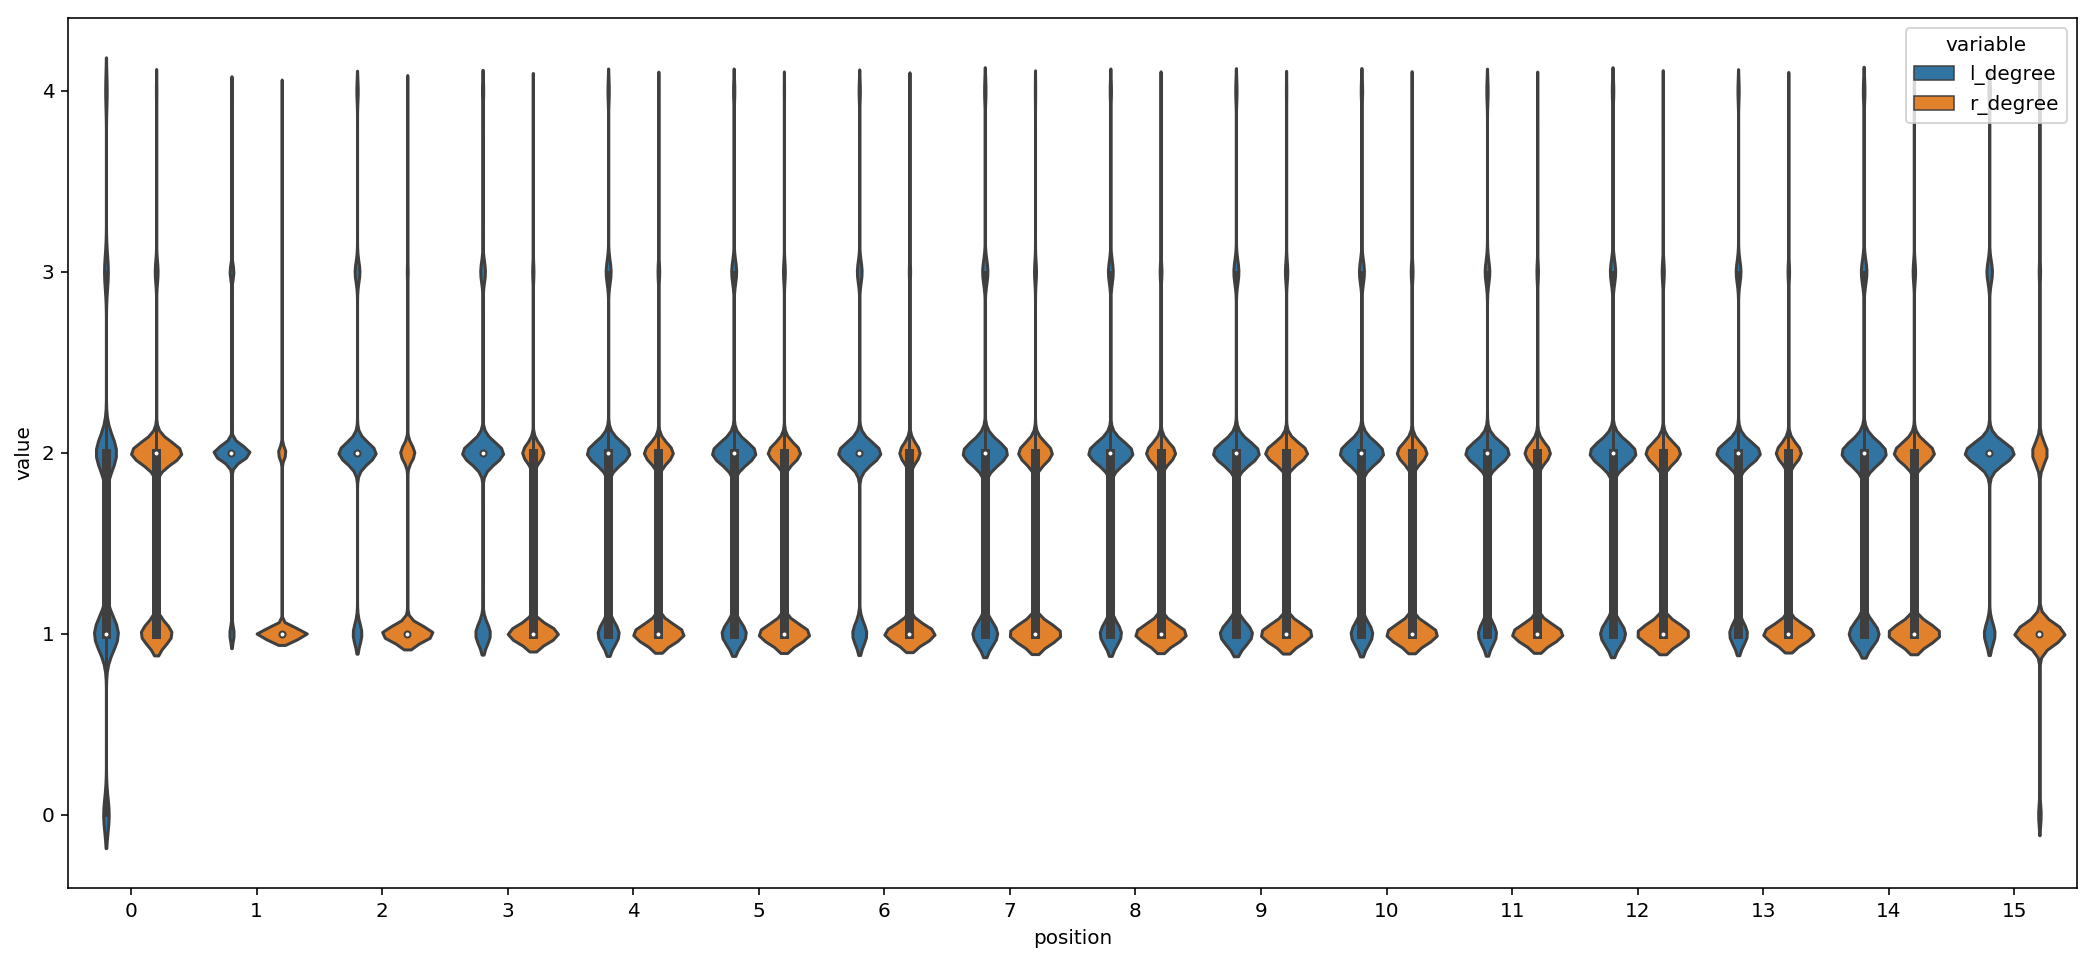

In [60]:
figsize(18,8)
sns.violinplot('position', 'value', 'variable', melted_df)

In [113]:
k35_dnodes_per_read = k35_df.groupby('read_n').count().\
    reset_index()[['read_n', 'hash']].rename({'hash': 'n_dnodes'}, axis='columns')
    
k27_dnodes_per_read = k27_df.groupby('read_n').count().\
    reset_index()[['read_n', 'hash']].rename({'hash': 'n_dnodes'}, axis='columns')

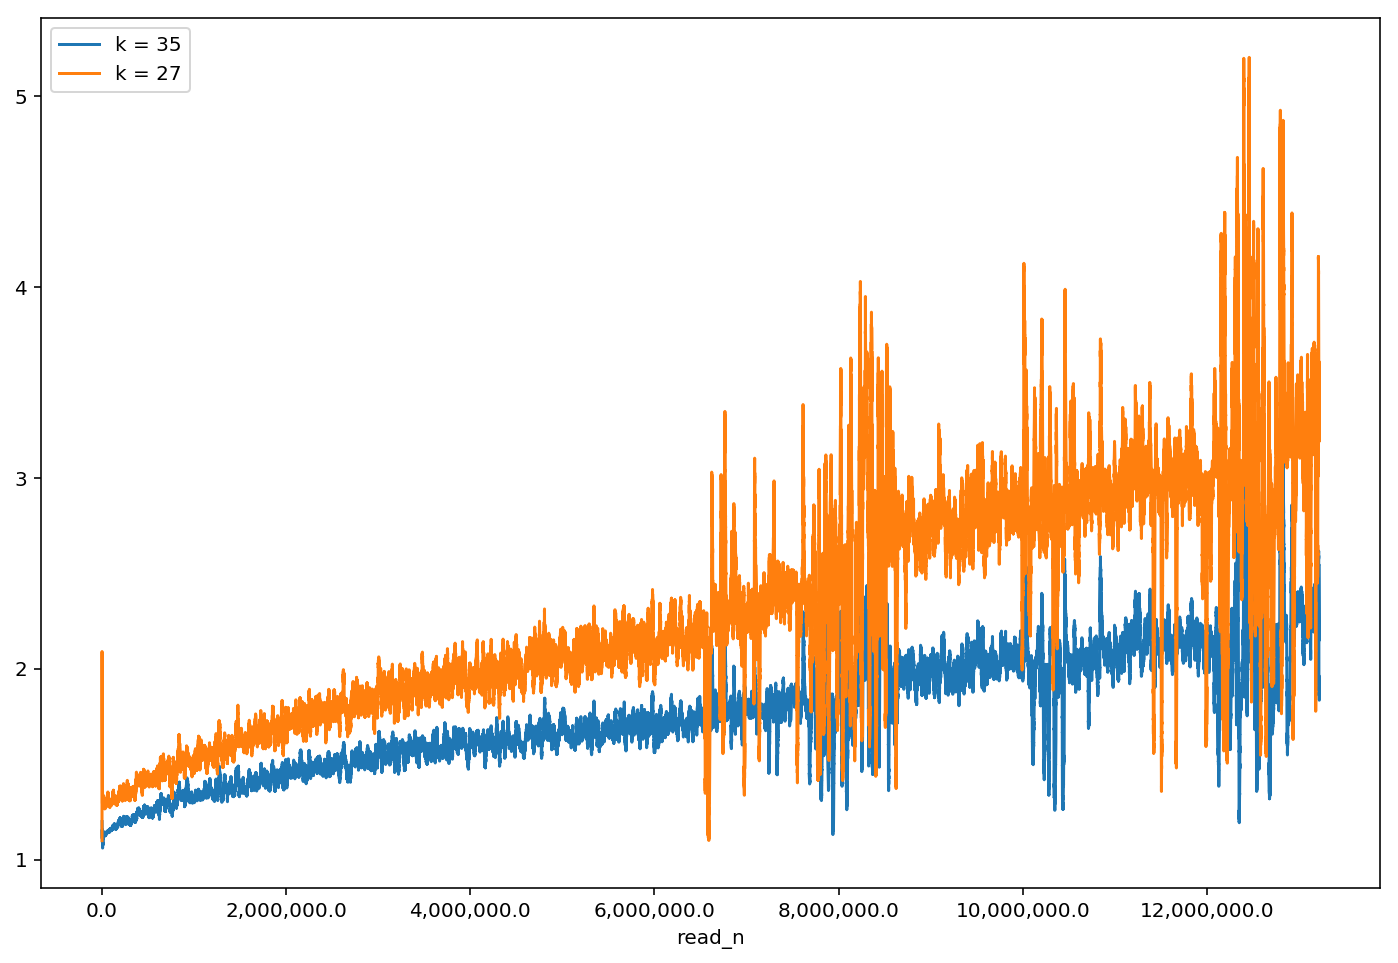

In [117]:
ax = k35_dnodes_per_read.rolling(1000, min_periods=10, on='read_n').mean().plot(x='read_n', 
                                                                               y='n_dnodes', 
                                                                               label='k = 35')

ax = k27_dnodes_per_read.rolling(1000, min_periods=10, on='read_n').mean().plot(x='read_n', 
                                                                               y='n_dnodes', 
                                                                               label='k = 27', 
                                                                               ax=ax)

ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter("{x:,}"))